In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import efficientnet.tfkeras as efn 

In [2]:
print(tf.__version__)

2.5.0


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Num GPUs Available:  2
2 Physical GPUs, 2 Logical GPUs


In [4]:
train_dir = '/home/mikylab/cycleGan/melanomaImages/train/'
train_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/train.csv')

test_dir = '/home/mikylab/cycleGan/2016_test_data/'
test_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/ISBI2016_GroundTruth.csv')
train_csv.shape

test_2017_dir = '/home/mikylab/cycleGan/ISIC-2017_TestData/'
test_2017_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/ISIC-2017_Test_GroundTruth.csv')

In [5]:
MSKCC_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/MSKCC_contribution.csv')

In [6]:
MSKCC_frame = pd.DataFrame({'image_dir': MSKCC_csv['name'], 'target': MSKCC_csv['meta.clinical.benign_malignant']})

In [7]:
MSKCC_frame.target[MSKCC_frame.target == 'benign'] = 0
MSKCC_frame.target[MSKCC_frame.target == 'malignant'] = 1
MSKCC_frame.target = MSKCC_frame.target.apply(int)

In [8]:
MSKCC_mal_train = MSKCC_frame[MSKCC_frame['target']==1]
MSKCC_ben_train = MSKCC_frame[MSKCC_frame['target']==0]#.sample(n=500, random_state = 316)

MSKCC_ben_train2 = MSKCC_frame[MSKCC_frame['target']==0].sample(n=500, random_state = 316)
MSKCC_frame2 =  pd.concat([MSKCC_mal_train, MSKCC_ben_train2], ignore_index=True, sort =False)
MSKCC_frame2['image_dir'] = train_dir + MSKCC_frame2['image_dir'] + '.jpg'




MSKCC_frame =  pd.concat([MSKCC_mal_train, MSKCC_ben_train], ignore_index=True, sort =False)



In [9]:
MSKCC_frame['image_dir'] = train_dir + MSKCC_frame['image_dir'] + '.jpg'

In [136]:
BCN_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/BCN_contribution.csv')
BCN_frame = pd.DataFrame({'image_dir': BCN_csv['name'], 'target': BCN_csv['meta.clinical.benign_malignant']})
BCN_frame.target[BCN_frame.target == 'benign'] = 0
BCN_frame.target[BCN_frame.target == 'malignant'] = 1
BCN_frame.target = BCN_frame.target.apply(int)



In [137]:
BCN_frame['image_dir'] = train_dir + BCN_frame['image_dir'] + '.jpg'

In [138]:
BCN_frame3 = BCN_frame.copy(deep=True)

In [139]:
BCN_mal_train = BCN_frame[BCN_frame['target']==1]
BCN_ben_train = BCN_frame[BCN_frame['target']==0]#.sample(n=500, random_state = 316)

BCN_ben_train2 = BCN_frame[BCN_frame['target']==0].sample(n=500, random_state = 316)
BCN_frame2 =  pd.concat([BCN_mal_train, BCN_ben_train2], ignore_index=True, sort =False)

BCN_frame =  pd.concat([BCN_mal_train, BCN_ben_train], ignore_index=True, sort =False)

In [140]:
neg, pos = np.bincount(train_csv['target'])
total = neg + pos
print('Melanoma Classification:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Melanoma Classification:
    Total: 33126
    Positive: 584 (1.76% of total)



In [141]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [142]:
mal_train = train_csv[train_csv['target']==1]
ben_train = train_csv[train_csv['target']==0]#.sample(n=2000, random_state = 316)
total_train =  pd.concat([mal_train, ben_train], ignore_index=True, sort =False)



In [143]:
#combine and change image_name to directory values
total_train =  pd.concat([mal_train, ben_train], ignore_index=True, sort =False)
total_train['image_name'] = train_dir + total_train['image_name'] + '.jpg'

#remove unnecessary columns
total_train = total_train.drop(['patient_id', 'sex', 'age_approx', 'anatom_site_general_challenge', 'diagnosis', 'benign_malignant'], axis = 1)

In [144]:
total_test = pd.DataFrame({'image_dir': test_csv['ISIC_0000003'], 'target': test_csv['0.0']})

In [145]:
total_test['image_dir'] = test_dir + total_test['image_dir'] + '.jpg'

In [146]:
test_2017_frame = pd.DataFrame({'image_dir': test_2017_csv['image_id'], 'target': test_2017_csv['melanoma']})

In [147]:
test_2017_frame['image_dir'] = test_2017_dir + test_2017_frame['image_dir'] + '.jpg'

In [148]:
neg, pos = np.bincount(val_gen2['target'])
total = neg + pos
print('Melanoma Classification:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Melanoma Classification:
    Total: 136
    Positive: 34 (25.00% of total)



In [149]:
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(total_train['image_name'], total_train['target'], test_size = 0.2, shuffle = True, random_state = 316)
# train_gen = pd.DataFrame({'image_dir': x_train, 'target': y_train})
# val_gen = pd.DataFrame({'image_dir': x_val, 'target': y_val})


In [150]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(BCN_frame['image_dir'], BCN_frame['target'], test_size = 0.2, shuffle = True, random_state = 316)
train_gen = pd.DataFrame({'image_dir': x_train, 'target': y_train})
val_gen = pd.DataFrame({'image_dir': x_val, 'target': y_val})


In [151]:
from sklearn.model_selection import train_test_split
x_train2, x_val2, y_train2, y_val2 = train_test_split(BCN_frame2['image_dir'], BCN_frame2['target'], test_size = 0.2, shuffle = True, random_state = 316)
train_gen2 = pd.DataFrame({'image_dir': x_train2, 'target': y_train2})
val_gen2 = pd.DataFrame({'image_dir': x_val2, 'target': y_val2})



In [24]:
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(BCN_frame['image_dir'], BCN_frame['target'], test_size = 0.2, shuffle = True, random_state = 316)
# train_gen = pd.DataFrame({'image_dir': x_train, 'target': y_train})
# val_gen = pd.DataFrame({'image_dir': x_val, 'target': y_val})



In [95]:
neg, pos = np.bincount(val_gen['target'])
total = neg + pos
print('Melanoma Classification:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Melanoma Classification:
    Total: 2222
    Positive: 35 (1.58% of total)



In [78]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.72
Weight for class 1: 1.66


In [34]:
train_gen['target'].astype(dtype = 'int16')
val_gen['target'].astype(dtype = 'int16')

6167    0
7240    0
5583    0
7000    0
3526    0
       ..
1002    0
2817    0
6026    0
975     0
2291    0
Name: target, Length: 1463, dtype: int16

In [105]:
from albumentations import (Compose, GaussNoise, Blur, 
                            Affine, Perspective,Sharpen, Superpixels,
                            CenterCrop, ChannelDropout, ChannelShuffle, 
                            CLAHE, CoarseDropout, Downscale, 
                            ElasticTransform, Equalize, FancyPCA, 
                            Flip, GaussianBlur, GlassBlur, 
                            GridDistortion, GridDropout, Posterize, 
                            RandomBrightness, RandomContrast, RandomFog, #RandomBrightnessContrast,
                            RandomGamma, 
                            RandomGridShuffle, #RandomRain, RandomShow, Transpose
                            RandomShadow, RandomRotate90, #RandomResizedCrop
                            
                            VerticalFlip, HorizontalFlip, RandomBrightness, RandomContrast, 
                            OpticalDistortion, HueSaturationValue, ShiftScaleRotate, Cutout, OneOf,
                            ColorJitter
                           )

In [106]:
# AUGMENTATIONS = Compose([CLAHE(p=1),
#                         #CoarseDropout(max_holes=5, max_height=24, max_width=40, min_holes = 2, min_height = 10, min_width = 30, fill_value=0), no p so remove
#                         ElasticTransform(alpha=1, sigma=50, alpha_affine=50, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, approximate=False, p=0.2),
#                         #Equalize(mode='cv', by_channels=True, mask=None, mask_params=()),
#                         FancyPCA(alpha=0.1, p=0.2),
#                         Flip(p=0.2),
#                         GaussianBlur(blur_limit=7, p=0.2),
#                         GaussNoise(var_limit=(10.0, 50.0), mean=0, p=0.2),
#                         #GlassBlur(sigma=0.7, max_delta=4, iterations=2, mode='fast')
#                         GridDistortion(num_steps=5, distort_limit=0.3, interpolation=1, border_mode=4, value=None, mask_value=None, p=0.2),
#                         RandomRotate90(p=0.3),
                         
# #                         Affine(p=.02),
# #                         RandomGamma(gamma_limit=(80,120), p=0.1),
# #                         Superpixels(p=0.2)
                        
#                         ])

In [107]:
AUGMENTATIONS = Compose([
                        VerticalFlip(p =.5), 
                        HorizontalFlip(p =.5),
                        RandomBrightness(p = .5), 
                        RandomContrast(p =.5), 
                        OneOf([
                            OpticalDistortion(distort_limit =1.0), 
                            GridDistortion(num_steps=5, distort_limit = 1.), 
                            ElasticTransform(alpha=3),
                        ]),
                        CLAHE(clip_limit=4.0, p=0.7), 
                        HueSaturationValue(hue_shift_limit = 10, sat_shift_limit= 20, val_shift_limit = 10, p = .5), 
                        ShiftScaleRotate (shift_limit = 0.2, scale_limit = 0.1, rotate_limit = 15, border_mode = 0, p = .85), 
                        Cutout(max_h_size = int(256*.375), max_w_size = int(256*.375), num_holes =1, p = 0.7), 
                        
                        
#                         GaussianBlur(blur_limit=7, p=0.2),
#                         GaussNoise(var_limit=(10.0, 50.0), mean=0, p=0.2)
                        Affine(scale = [0.7, 1.3],  translate_percent = .25, rotate = [-360, 360], shear = [0, 20]),
                        ColorJitter(brightness=[0.9, 1.1], contrast=[0.9, 1.1], saturation=[0.9, 1.1], hue=[0, .2], always_apply=False, p=0.5)
    
])



/home/mikylab/.local/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1699: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/mikylab/.local/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1725: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/mikylab/.local/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:643: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


In [109]:
from ImageDataAugmentor.image_data_augmentor import *

In [110]:
train_image_gen = ImageDataAugmentor(rescale=1./255,
                                     augment = AUGMENTATIONS
                                    )

In [111]:
class CustomDataGenerator(ImageDataGenerator):
    def __init__(self,
               degree= None, 
               **kwargs):
        super().__init__(
            preprocessing_function=self.rotate,
            **kwargs)
        self.degree = degree
    def rotate(self, image):
        if (self.degree == 0): #0
            image = tf.image.rot90(image, k=0)
        elif (self.degree == 90): #90
            image = tf.image.rot90(image, k=1)
            
        elif(self.degree == 180): #180
            image = tf.image.rot90(image, k=2)

        elif (self.degree == 270): #270
            image = tf.image.rot90(image, k=3)
        
        return image
   

In [112]:
# train_image_gen = ImageDataGenerator(rescale=1./255, 
#                             rotation_range = 360, 
#                             horizontal_flip = True, 
#                             vertical_flip = True, 
#                             brightness_range = [0.7, 1.3]
#                               )

test_image_gen = ImageDataGenerator(rescale=1./255)
# test_image_gen = CustomDataGenerator(
#                             degree = 270,
#                             rescale=1./255)

In [122]:
Train_Data = train_image_gen.flow_from_dataframe(dataframe = train_gen,
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw', 
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = True,
#                                               subset = 'training'
                                    )

Val_Data = test_image_gen.flow_from_dataframe(dataframe = val_gen,
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = False,
#                                               subset = 'validation'
                                    )

Found 572 validated image filenames.
Found 144 validated image filenames.


In [259]:
load_model_MSKCC.evaluate(Val_Data)

144/144 [==============================] - 7s 47ms/step - loss: 0.3528 - tp: 26.0000 - fp: 7.0000 - tn: 94.0000 - fn: 17.0000 - accuracy: 0.8333 - precision: 0.7879 - recall: 0.6047 - auc: 0.9110 - prc: 0.8049 - specificity_at_sensitivity_2: 0.8317


[0.35279133915901184,
 26.0,
 7.0,
 94.0,
 17.0,
 0.8333333134651184,
 0.7878788113594055,
 0.604651153087616,
 0.9110062718391418,
 0.8049284219741821,
 0.8316831588745117]

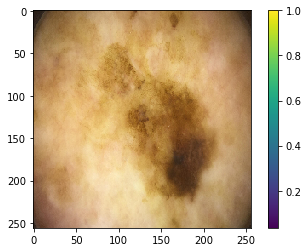

In [123]:
for i in range(0,1):
        image = Val_Data[i] 
        plt.imshow(image[0][0,:, :])
        plt.colorbar()

In [132]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import asarray



def load_images(path, size=(256,256)):
    data_list = list()
    # enumerate filenames in directory, assume all are images
    for filename in path:
        # load and resize the image
        pixels = load_img(filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # store
        data_list.append(pixels)
    return asarray(data_list)

val_images = val_gen['image_dir'].to_numpy()

In [133]:
testData = load_images(val_images)

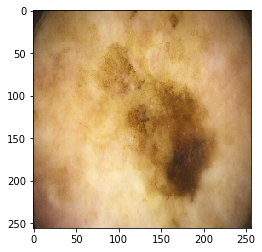

In [136]:
plt.imshow(testData[0,:,:,:]/255.)

In [96]:
MSKCC_data = test_image_gen.flow_from_dataframe(dataframe = MSKCC_frame,
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = False,
#                                               subset = 'validation'
                                    )

Found 11108 validated image filenames.


In [40]:
Test_Data = test_image_gen.flow_from_dataframe(dataframe = total_test, 
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = False,
                                              )

Found 378 validated image filenames.


In [98]:
BCN_Test = test_image_gen.flow_from_dataframe(dataframe = BCN_frame, 
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = False,
                                              )

Found 7311 validated image filenames.


In [99]:
Test_Data_17 = test_image_gen.flow_from_dataframe(dataframe = test_2017_frame, 
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = False,
                                              )

Found 600 validated image filenames.


In [50]:
# def create_model():  
#     enb3 = efn.EfficientNetB3(weights="noisy-student", include_top=False, input_shape=(256, 256, 3), pooling = 'avg')
#     x = tf.keras.layers.Flatten()(enb3.output)
#     output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
#     model = tf.keras.Model(enb3.input, output)
#     return model 

In [43]:
def create_model():  
    enb3 = tf.keras.applications.EfficientNetB3(weights="imagenet", include_top=False, input_shape=(256, 256, 3), pooling = 'avg')
    x = tf.keras.layers.Flatten()(enb3.output)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(enb3.input, output)
    return model 

In [44]:
initial_bias = np.log([pos/neg])
model = create_model()
# model.summary()


In [48]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=20, decay_rate=0.96, staircase=True
)

In [47]:
opt = tf.keras.optimizers.Adam(learning_rate = 1e-5 )#1e-5)
model.compile(loss='binary_crossentropy', metrics=tf.keras.metrics.AUC(name="auc"),optimizer=opt)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 100, verbose = 1, restore_best_weights = True)
cb = early_stopping

In [45]:
# results = model.evaluate(Train_Data, batch_size=1, verbose=0, steps = 300)
# print("Loss: {:0.4f}".format(results[0]))

In [ ]:
history = model.fit(
    Train_Data,
    steps_per_epoch= 300,
    epochs= 500,
    validation_data=Val_Data,
    callbacks=cb,
    class_weight = class_weight,
    validation_steps= 100)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/500
300/300 [==============================] - 46s 79ms/step - loss: 0.7727 - auc: 0.3446 - val_loss: 0.6647 - val_auc: 0.4714
Epoch 2/500
300/300 [==============================] - 21s 70ms/step - loss: 0.8683 - auc: 0.4558 - val_loss: 7.8564 - val_auc: 0.3750
Epoch 3/500
300/300 [==============================] - 23s 77ms/step - loss: 0.8795 - auc: 0.5378 - val_loss: 379.1934 - val_auc: 0.3477
Epoch 4/500
300/300 [==============================] - 23s 76ms/step - loss: 0.6310 - auc: 0.6630 - val_loss: 0.6820 - val_auc: 0.4440
Epoch 5/500
300/300 [==============================] - 23s 77ms/step - loss: 0.5212 - auc: 0.5891 - val_loss: 1.1378 - val_auc: 0.6146
Epoch 6/500
300/300 [==============================] - 22s 75ms/step - loss: 0.7387 - auc: 0.4899 - val_loss: 54.5389 - val_auc: 0.6471
Epoch 7/500
300/300 [============================

In [50]:
print('done')

done


In [52]:
print('done2')

done2


In [62]:
model.save('cnn_melanoma_MSKCC_full_weights_7.26.h5')

/usr/lib/python3/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [234]:
load_model = tf.keras.models.load_model('models/cnn_melanoma_MSKCC_small_noweights_7.4.h5')

In [101]:
load_model.evaluate(BCN_Test)

7311/7311 [==============================] - 129s 18ms/step - loss: 0.4123 - tp: 64.0000 - fp: 1067.0000 - tn: 6065.0000 - fn: 115.0000 - accuracy: 0.8383 - precision: 0.0566 - recall: 0.3575 - auc: 0.6967 - prc: 0.0587 - specificity_at_sensitivity: 0.4250


[0.4123007655143738,
 64.0,
 1067.0,
 6065.0,
 115.0,
 0.8383257985115051,
 0.0565870925784111,
 0.35754188895225525,
 0.6967143416404724,
 0.058677468448877335,
 0.42498597502708435]

In [85]:
load_model.evaluate(MSKCC_data)

11108/11108 [==============================] - 595s 54ms/step - loss: 0.1822 - tp: 24.0000 - fp: 317.0000 - tn: 10575.0000 - fn: 192.0000 - accuracy: 0.9542 - precision: 0.0704 - recall: 0.1111 - auc: 0.7363 - prc: 0.0476 - specificity_at_sensitivity: 0.5297


[0.1821841448545456,
 24.0,
 317.0,
 10575.0,
 192.0,
 0.9541771411895752,
 0.07038123160600662,
 0.1111111119389534,
 0.7363299131393433,
 0.04764718562364578,
 0.5297465920448303]

In [86]:
load_model.evaluate(BCN_Test)

7311/7311 [==============================] - 130s 18ms/step - loss: 0.3752 - tp: 92.0000 - fp: 761.0000 - tn: 6371.0000 - fn: 87.0000 - accuracy: 0.8840 - precision: 0.1079 - recall: 0.5140 - auc: 0.8245 - prc: 0.1452 - specificity_at_sensitivity: 0.6534


[0.37521153688430786,
 92.0,
 761.0,
 6371.0,
 87.0,
 0.884010374546051,
 0.10785462707281113,
 0.5139665007591248,
 0.8244805335998535,
 0.14516812562942505,
 0.6533931493759155]

In [45]:
model.evaluate(Val_Data)

136/136 [==============================] - 2s 15ms/step - loss: 0.4597 - auc: 0.8312


[0.45972317457199097, 0.8311706185340881]

In [56]:
load_model.evaluate(Test_Data_17)

600/600 [==============================] - 75s 125ms/step - loss: 0.9277 - tp: 34.0000 - fp: 95.0000 - tn: 388.0000 - fn: 83.0000 - accuracy: 0.7033 - precision: 0.2636 - recall: 0.2906 - auc: 0.5678 - prc: 0.2318 - specificity_at_sensitivity: 0.2257


[0.927656888961792,
 34.0,
 95.0,
 388.0,
 83.0,
 0.70333331823349,
 0.26356589794158936,
 0.2905983030796051,
 0.5678009390830994,
 0.23179689049720764,
 0.2256728708744049]

In [64]:
load_model = tf.keras.models.load_model('cnn_melanoma_MSKCC_full_weights_7.26.h5')

In [65]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      tf.keras.metrics.SpecificityAtSensitivity(.82)
]

load_model.compile(loss='binary_crossentropy', metrics=METRICS,optimizer=opt)



In [66]:
load_model.evaluate(Val_Data)

1463/1463 [==============================] - 29s 19ms/step - loss: 0.1354 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1427.0000 - fn: 36.0000 - accuracy: 0.9754 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5663 - prc: 0.0272 - specificity_at_sensitivity: 0.2278


[0.13535165786743164,
 0.0,
 0.0,
 1427.0,
 36.0,
 0.9753930568695068,
 0.0,
 0.0,
 0.5662715435028076,
 0.027169708162546158,
 0.2277505248785019]

In [ ]:
train_x, train_y = Test_Data_2.next()
train_x_new = train_x[0,:, :]
plt.imshow(train_x_new)
print(train_y)

In [ ]:
img_array = tf.expand_dims(train_x_new, axis=0)
plt.imshow(train_x_new)
plt.title(' Truth: ' + str(train_y)+ " Pred: " + str(load_model.predict(img_array)[0]))
# plt.axis("off")
print(train_y)

In [ ]:
img_array = tf.expand_dims(train_x_new, axis=0)
plt.imshow(train_x_new)
plt.title(' Truth: ' + str(train_y)+ " Pred: " + str(model.predict(img_array)[0]))
# plt.axis("off")
print(train_y)

In [94]:
predicted_labels_test = model.predict(Test_Data)

In [95]:
# predicted_labels_test[predicted_labels_test>=.5] = 1
# predicted_labels_test[predicted_labels_test<.5] = 0

In [96]:
true_labels_test =total_test['target'].to_numpy().reshape(378,)
predicted_labels_test =predicted_labels_test.squeeze()

In [97]:
predicted_labels_test_17 = model.predict(Test_Data_17)
true_labels_test_17 =test_2017_frame['target'].to_numpy().reshape(600,)
predicted_labels_test_17 =predicted_labels_test_17.squeeze()

In [98]:
predicted_labels_val = model.predict(Val_Data)
# predicted_labels_val[predicted_labels_val>=.5] = 1
# predicted_labels_val[predicted_labels_val<.5] = 0

In [99]:
true_labels_val =val_gen['target'].to_numpy().reshape(517,)
predicted_labels_val =predicted_labels_val.squeeze()

ValueError: cannot reshape array of size 136 into shape (517,)

In [ ]:
import sklearn
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
#     plt.xlim([-0.5,20])
#     plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("Val Baseline", true_labels_val, predicted_labels_val, color=colors[0], linestyle='--')
plot_roc("Test_2016 Baseline", true_labels_test, predicted_labels_test, color=colors[1])
plot_roc("Test_2017 Baseline", true_labels_test_17, predicted_labels_test_17, color=colors[2])


plt.legend(loc='lower right')

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


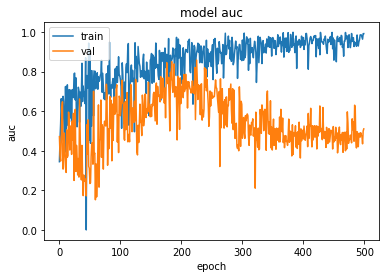

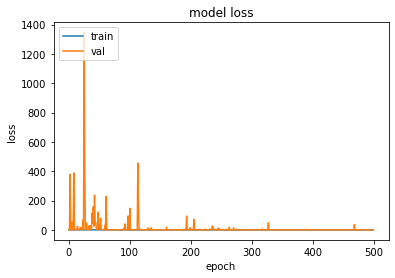

In [61]:
print(history.history.keys())
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()